In [1]:
# %%
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
# 1. Load
_,t,flux = np.loadtxt("DATA/KIC006922244.tbl",unpack=True,skiprows=3)

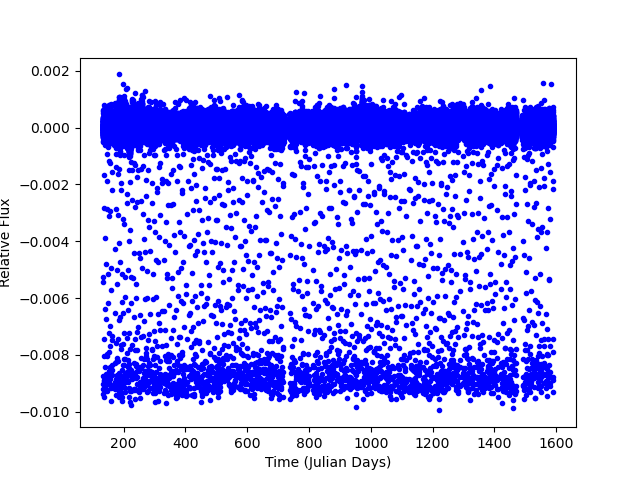

In [3]:
# 2. Straight plot
plt.figure()
plt.plot(t,flux,"b.")
plt.xlabel("Time (Julian Days)")
plt.ylabel("Relative Flux")
plt.show()

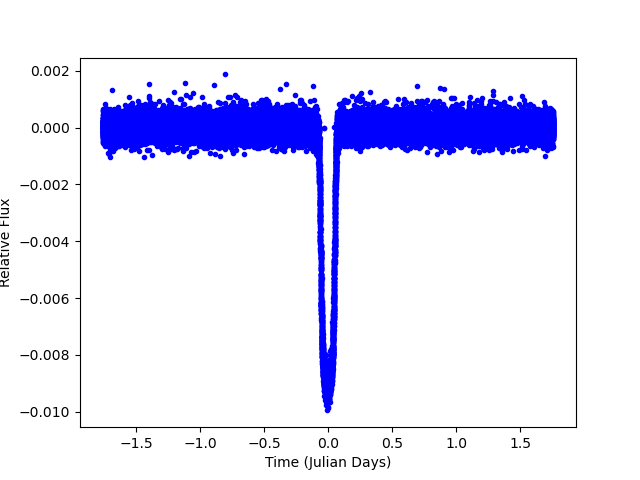

In [4]:
# 3. Phase-folded plot
first_transit = 131.690
period = 3.5225
t_fold = (t - (first_transit - period/2)) % period
t_fold = t_fold - period/2 # Center transit at zero

plt.figure()
plt.plot(t_fold,flux,"b.")
plt.xlabel("Time (Julian Days)")
plt.ylabel("Relative Flux")
plt.show()

In [5]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# 4. Parameters:
| Parameter | Value |
|:----------|-------|
| Maximum depth of transit | y = -0.0090 |
| Time that transit begins | x = -0.074 |
| Time transit reaches maximum depth| x = -0.033 |
| Time that transit reached midpoint | x = -0.0017 |

## Transit Start-End
<img src="img/transit-start-end.png" alt="Transit Start-End" style="width: 400px;"/>

## Transit Max Depth
<img src="img/transit-max-depth.png" alt="Transit Max Depth" style="width: 400px;"/>


In [6]:
# 5. Piece-wise linear function
def piece_wise_model(t, debug=False):
    period = 3.5225
    t_epoch = period/2
    t_transit_start = -0.074
    t_transit_max_depth = -0.033
    t_transit_mid = -0.0017
    
    flux_depth = -0.0090
    
    t1 = t_transit_start
    t2 = t_transit_max_depth
    t3 = t2 + (t_transit_mid-t_transit_max_depth) * 2
    t4 = t3 + (t2 - t1)
    
    if debug:
        print(f"{t1=:.5f} {t2=:.5f} {t3=:.5f} {t4=:.5f}")
        assert(t1 < t2 < t3 < t4)
    
    if t < t1:
        flux = 0
    elif t < t2:
        interp = (t - t1) / (t2 - t1)
        flux = interp * flux_depth
    elif t < t3:
        flux = flux_depth
    elif t < t4:
        interp = (t - t3) / (t4 - t3)
        flux = flux_depth * (1 - interp)
    else:
        flux = 0
        
    return flux

In [7]:
# Testing...
piece_wise_model(0,True)

t1=-0.07400 t2=-0.03300 t3=0.02960 t4=0.07060


-0.009

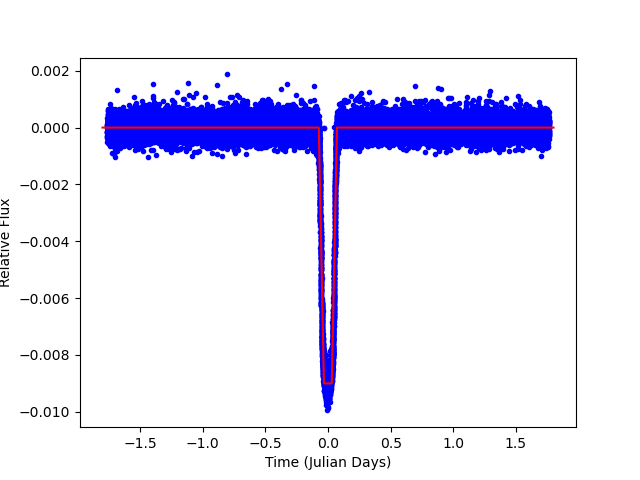

In [8]:
# Evaluate piece-wise model...
t_model = np.arange(-1.8,1.8,0.001)
flux_model = [piece_wise_model(t_m) for t_m in t_model]

plt.figure()
plt.plot(t_fold,flux,"b.")
plt.plot(t_model,flux_model,"r-")
plt.xlabel("Time (Julian Days)")
plt.ylabel("Relative Flux")
plt.show()